# Particle Swarm Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function to create the swarm

In [2]:
def create_swarm(ub, lb, vMax, vMin, nVar, noP):
  # ub -> vector of upper bounds for each variable
  # lb -> vector of lower bounds for each variable
  # nVar -> number of variables
  # noP -> number of particles
  return {
    'particles': [
      {
        'X' : (ub - lb) * np.random.rand(nVar) + lb,
        'V' : (vMax - vMin) * np.random.rand(nVar) + vMin, # inital velocity provided randomly
        'pbest' : {
          'X' : np.zeros(nVar),
          'O' : np.inf
        }
      } for i in range(noP)],
    'gbest' : {
      'X' : np.zeros(nVar),
      'O' : np.inf
    }
  }

## Function to run the iterations

In [3]:
def run_iterations(swarm, maxIter, noP, lb, ub, nVar, vMax, vMin, c1, c2, wMax, wMin, objective):

  gbests = []
  

  for t in range(maxIter):
    
    # for current positions, updating objective, pbest and gbest values
    for k in range(noP):
      currentX = swarm['particles'][k]['X']
      currO = objective(currentX)
  
      if currO < swarm['particles'][k]['pbest']['O']:
        swarm['particles'][k]['pbest']['X'] = currentX.copy()
        swarm['particles'][k]['pbest']['O'] = currO.copy()

      if currO < swarm['gbest']['O']:
        swarm['gbest']['X'] = currentX.copy()
        swarm['gbest']['O'] = currO.copy()

    # updating the weight
    w = wMax - (t+1) * ((wMax - wMin)/maxIter)

    # updating position and velocity vectors for each particle
    for k in range(noP):
      swarm['particles'][k]['V'] = w * swarm['particles'][k]['V'] \
                  + c1 * np.random.rand(nVar) * (swarm['particles'][k]['pbest']['X'] - swarm['particles'][k]['X']) \
                  + c2 * np.random.rand(nVar) * (swarm['gbest']['X'] - swarm['particles'][k]['X'])

      # limiting the velocity
      swarm['particles'][k]['V'] = np.minimum(swarm['particles'][k]['V'], vMax)
      swarm['particles'][k]['V'] = np.maximum(swarm['particles'][k]['V'], vMin)

      swarm['particles'][k]['X'] = swarm['particles'][k]['X'] + swarm['particles'][k]['V']

      # limiting the position
      swarm['particles'][k]['X'] = np.minimum(swarm['particles'][k]['X'], ub)
      swarm['particles'][k]['X'] = np.maximum(swarm['particles'][k]['X'], lb)

    gbests.append(swarm['gbest']['O'])

  print('Optimum value : ', swarm['gbest']['O'])
  print('Optimum position : ', swarm['gbest']['X'])
  return gbests

## Function to plot the graph of GBEST vs iterations

In [4]:
def make_plot(gbests):
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.set_yscale('log')
  ax.set_ylabel('Value of GBEST')
  ax.set_xlabel('Iteration #')
  ax.plot(gbests)

## Top level function

In [5]:
def particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin):
  swarm = create_swarm(ub, lb, vMax, vMin, nVar, noP)
  gbests = run_iterations(swarm, maxIter, noP, lb, ub, nVar, vMax, vMin, c1, c2, wMax, wMin, objective)
  make_plot(gbests)

## Graphing for different values of parameters

### Case 1 : c1 = c2 = 2

Optimum value :  1.2862123911587249e-23
Optimum position :  [ 7.92812055e-13 -9.49613615e-13 -2.84680331e-13 -5.83367314e-13
 -1.65139185e-13  2.62946583e-12 -5.15979358e-13 -5.80563100e-13
 -3.16089971e-13  1.80717570e-12]


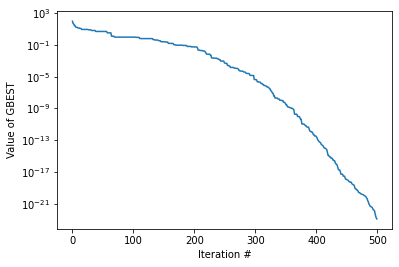

In [6]:
# defining the parameters of the problem
nVar = 10
ub = np.array([10 for i in range(nVar)])
lb = np.array([-10 for i in range(nVar)])
vMax = (ub - lb) * 0.2
vMin = -vMax

def objective(x):
  return np.sum(np.square(x)) 

# defining the parameters of Particle Swarm Optimization
noP = 30
maxIter = 500
wMax = 0.9
wMin = 0.2
c1 = 2
c2 = 2

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)

### Case 2 : c1 = 0, c2 = 2

Optimum value :  7.571524069874673e-15
Optimum position :  [-9.53150474e-09  2.31166908e-12 -2.54657806e-09  7.73623170e-08
 -2.41197252e-09  1.77343525e-09 -3.98505706e-12 -9.24381054e-10
 -1.08795001e-11 -3.84635417e-08]


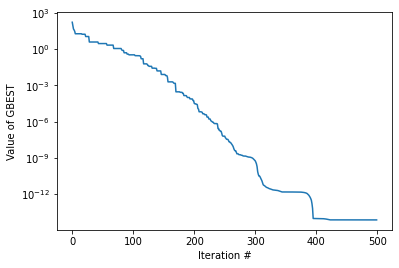

In [7]:
c1 = 0

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
c1 = 2 # reversing changes 

### Case 3 : c1 = 2, c2 = 0

Optimum value :  77.6470678962182
Optimum position :  [-2.32021569  6.03955016  1.74995935  0.19214722  0.52410441 -0.66891257
  0.0364737  -2.2683869  -1.50604372  4.95489819]


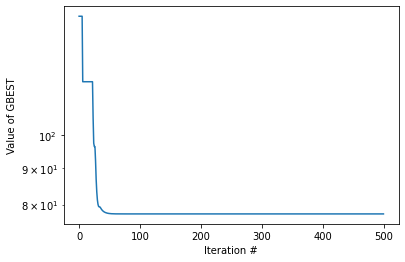

In [8]:
c2 = 0

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
c2 = 2 # reversing changes 

### Case 4 : c1 = c2 = 2, wMax = wMin = 0.9

Optimum value :  0.9377501963812397
Optimum position :  [ 2.36369055e-01  2.17762859e-01 -6.64456123e-04 -5.41449955e-03
 -2.40051839e-01 -8.04305007e-01 -5.58085419e-02 -8.84962746e-02
  3.23778753e-01 -1.18824034e-01]


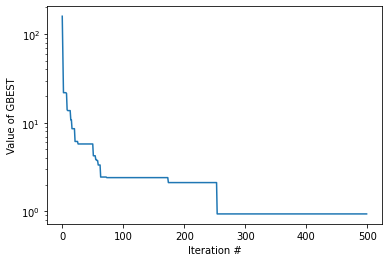

In [9]:
wMin = 0.9

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
wMin = 0.2 # reversing changes 

### Case 5 : c1 = c2 = 2, wMax = wMin = 0.2

Optimum value :  3.028308437246281e-19
Optimum position :  [-4.33838639e-10 -1.75820927e-11  2.05382226e-18 -1.88934290e-15
 -1.76940263e-11  1.71576517e-17 -1.30238942e-16  1.66772874e-12
  3.37620225e-10  1.57240832e-12]


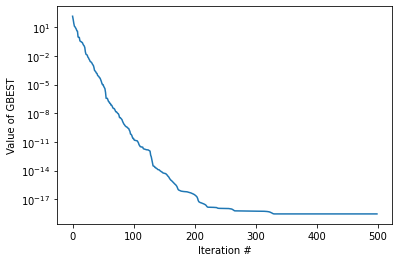

In [10]:
wMax = 0.2

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
wMax = 0.9 # reversing changes 

### Case 6 : Decreasing number of particles

Optimum value :  1.2712590550625596e-06
Optimum position :  [ 1.32367686e-04  2.97293205e-04 -1.36371246e-06  7.90288352e-04
  3.02517118e-05  6.04300605e-04 -1.18836996e-04 -8.95589482e-05
  1.91596062e-04 -3.40368310e-04]


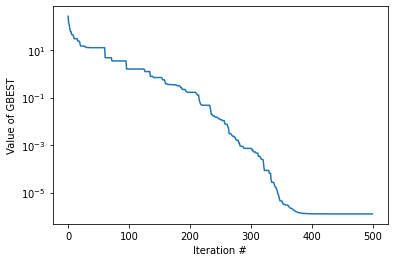

In [11]:
noP = 5


particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
noP = 30 # reversing changes 

### Case 6 : Increasing number of particles

Optimum value :  1.5593799503748166e-31
Optimum position :  [-1.79466785e-17  4.55812754e-17  2.03114247e-16  1.90873828e-16
 -8.62303382e-18 -1.23256953e-16  1.11868693e-16 -1.99799114e-16
 -7.90183220e-17 -4.36488811e-17]


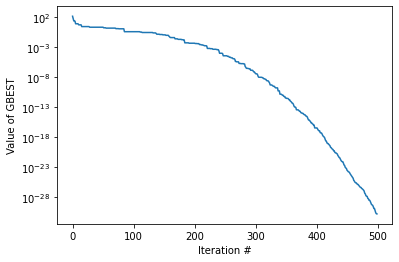

In [12]:
noP = 100

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)
noP = 30 # reversing changes 